# Data Preprocessing on Titanic Dataset
The data
To take a look at the competition data, click on the Data tab at the top of the competition page. Then, scroll down to find the list of files.
There are three files in the data: (1) train.csv, (2) test.csv, and (3) gender_submission.csv.

(1) train.csv
train.csv contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table). To investigate this data, click on the name of the file on the left of the screen. Once you've done this, you can view all of the data in the window.

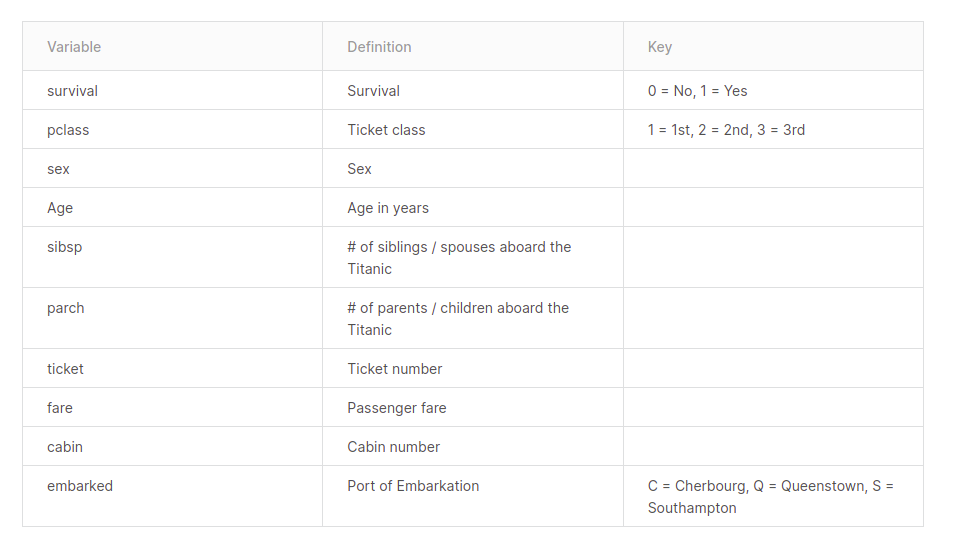

## Processing Steps
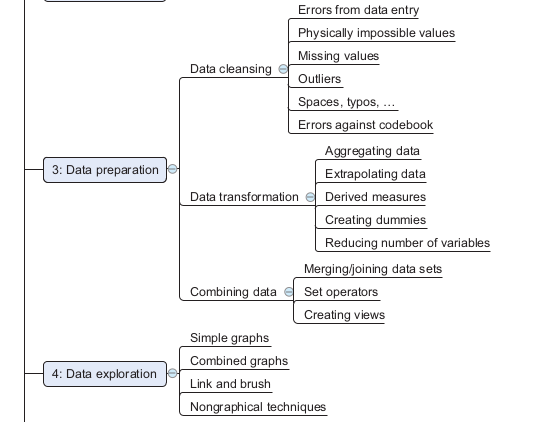

### Import Libraries

In [1]:
import numpy as np                 #Numpy is used for array manipulation and processing
import pandas as pd                #Pandas is used for table manipulation and processing
import matplotlib.pyplot as plt
import seaborn as sns              # A very useful library other than matplotlib for plotting

In [2]:
#Load Dataset into Pandas Dataframe
df = pd.read_csv('train.csv')

In [3]:
#read columnname of dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### The columns
Many of them are self-explanatory, but there are some that don't:

Embarked: Name of the port of embarkation

Parch: Number of parents/children aboard

SibSp: Number of siblings/spouses aboard

In [4]:
#Display first five samples
df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
741,742,0,1,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.8500,C46,S
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
144,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,NaN,S
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [5]:
#Display shape
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Find missing value exist
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### The columns 'Age' and 'Cabin' contains more null values.

###### Get insight of data

Survived' is the target column/variable.
'PassengerId', 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.


'Age' and 'Embarked' has less number of missing value. We have to impute them using different techniques.


As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.


'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare' doesn't have any missing values.


We can also create new variable like 'total size of the family' from the columns 'SibSp' and 'Parch'.

In [8]:
#visualization of target variable survived

In [9]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#this shows that there is a big imbalance between survive and non survived. As most of the people couldnt survived.

Text(0, 0.5, 'Passenger Count')

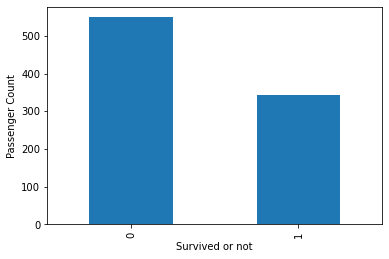

In [10]:
plt = df.Survived.value_counts().plot(kind='bar')
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

Text(0, 0.5, 'Count')

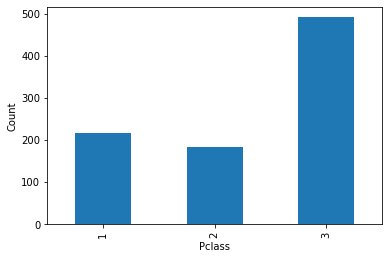

In [11]:
#plcass survival
plt = df.Pclass.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Count')

In [12]:
df[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


<AxesSubplot:xlabel='Pclass', ylabel='Count'>

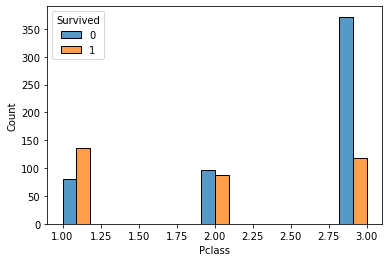

In [13]:
sns.histplot(data=df, x="Pclass", hue="Survived",  multiple="dodge")

<AxesSubplot:xlabel='Pclass'>

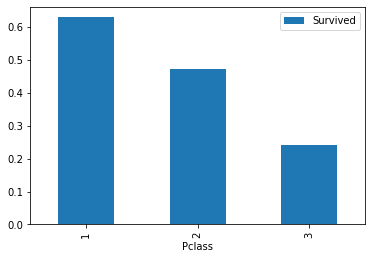

In [14]:
#Pclass - Survival probability
df[['Pclass', 'Survived']].groupby('Pclass').mean().plot(kind='bar')

Text(0, 0.5, 'Passenger count')

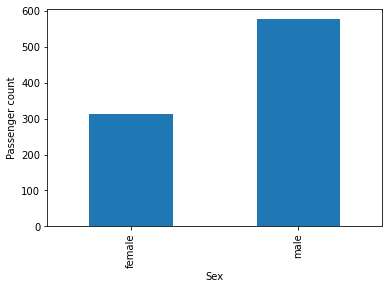

In [15]:
#
plt = df.Sex.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger count')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


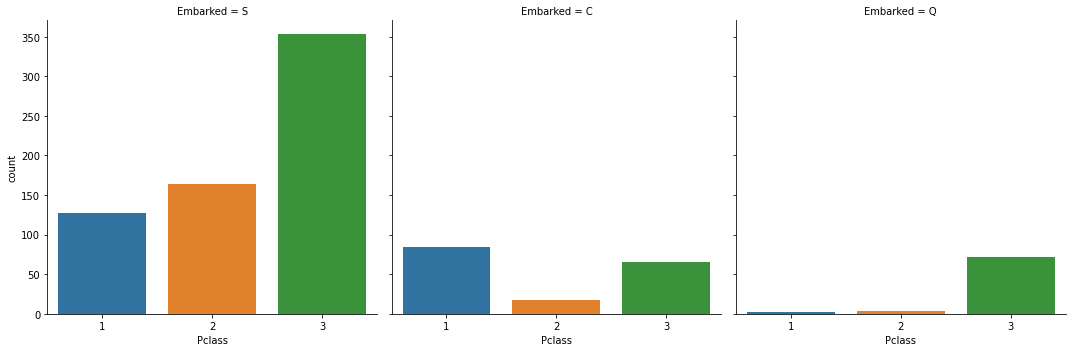

In [16]:
sns.factorplot('Pclass', col = 'Embarked', data = df, kind = 'count')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


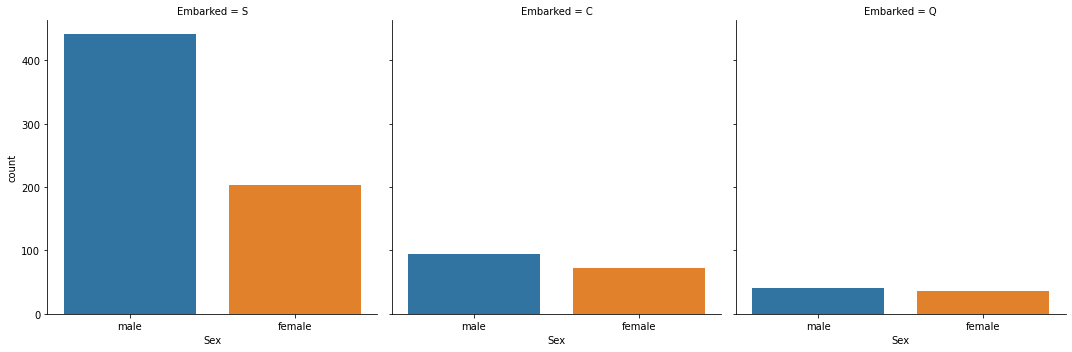

In [17]:
sns.factorplot('Sex', col = 'Embarked', data = df, kind = 'count')

##### Drop Columns

In this step, we are going to drop columns with the least priority. The column such as ‘PassengerId’ and ‘Ticket’ comes under this category. Use drop() to drop the columns.

In [18]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
646,647,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,S
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S
812,813,0,2,"Slemen, Mr. Richard James",male,35.0,0,0,28206,10.5000,NaN,S


In [19]:
#dropping ticket column
df.drop(['Ticket','PassengerId'], 1, inplace=True)

/tmp/ipykernel_15812/179259756.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['Ticket','PassengerId'], 1, inplace=True)


In [20]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
313,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,7.8958,NaN,S
790,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,7.7500,NaN,Q
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0000,A23,S
687,0,3,"Dakic, Mr. Branko",male,19.0,0,0,10.1708,NaN,S
614,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,8.0500,NaN,S


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


We can see that, only ‘Cabin’, ‘Embarked’ and ‘Age’ column has missing values. Let’s work on that now.

#### Creating new classes
‘Cabin’: Though Cabin column has 687 missing values, when you see carefully, it has a unique character at the beginning which denotes the deck number, therefore, we are going to create a column named Deck to extract this information, which may be used later in our prediction.

In [22]:
# user defined function 
def assignDeckValue(CabinCode):
    if pd.isnull(CabinCode):
        category = 'Unknown'
    else:
        category = CabinCode[0]
    return category
  
Deck = np.array([assignDeckValue(cabin) for cabin in df['Cabin'].values])

df =df.assign(Deck = Deck)

In [23]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
310,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,83.1583,C54,C,C
448,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,19.2583,NaN,C,Unknown
565,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,24.1500,NaN,S,Unknown
350,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,9.2250,NaN,S,Unknown
587,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,79.2000,B41,C,B


#‘ParCh’ and ‘SibSp’ are the details related to family size, so let’s derive a new column named ‘Size of the Family’.


In [24]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [25]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,FamilySize
152,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,8.05,NaN,S,Unknown,1
66,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,10.50,F33,S,F,1
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.00,C23 C25 C27,S,C,6
242,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,10.50,NaN,S,Unknown,1
654,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,6.75,NaN,Q,Unknown,1


Name’: Instead of dropping right away, from the Name of the Passenger, we need to get only their Title

In [26]:
# Using expression pattern to extract the Title of the passenger
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Changing to common category
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace('Mlle', 'Miss')

In [27]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,FamilySize,Title
37,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,8.0500,NaN,S,Unknown,1,Mr
87,0,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,8.0500,NaN,S,Unknown,1,Mr
668,0,3,"Cook, Mr. Jacob",male,43.0,0,0,8.0500,NaN,S,Unknown,1,Mr
688,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,7.7958,NaN,S,Unknown,1,Mr
366,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,75.2500,D37,C,D,2,Mrs


Now, let's drop Cabin, Name columns, we have extracted needed information from these two.

In [28]:
df.drop(['Cabin','Name'],1,inplace=True)


/tmp/ipykernel_15812/963057273.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['Cabin','Name'],1,inplace=True)


In [29]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,Title
438,0,1,male,64.0,1,4,263.00,S,C,6,Mr
728,0,2,male,25.0,1,0,26.00,S,Unknown,2,Mr
401,0,3,male,26.0,0,0,8.05,S,Unknown,1,Mr
257,1,1,female,30.0,0,0,86.50,S,B,1,Miss
480,0,3,male,9.0,5,2,46.90,S,Unknown,8,Master


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    889 non-null    object 
 8   Deck        891 non-null    object 
 9   FamilySize  891 non-null    int64  
 10  Title       891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Handling missing values

‘Embarked’: Only two rows are missing the values for Embarked column.
Embarked takes categorical values such as C = Cherbourg; Q = Queenstown; S = Southampton, here we can simply impute the missing values with most commonly occurred value, which is ‘S’ in this case.


In [31]:
# Returns count for each category
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
# Returns count for each category
df['Embarked'].value_counts()

# Fills null values with 'S'-most common occurence
common = 'S'
df['Embarked']=df['Embarked'].fillna('S')

# Checking the no of null values now
df['Embarked'].isnull().sum()

0

In [33]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,Title
695,0,2,male,52.0,0,0,13.5000,S,Unknown,1,Mr
215,1,1,female,31.0,1,0,113.2750,C,D,2,Miss
606,0,3,male,30.0,0,0,7.8958,S,Unknown,1,Mr
301,1,3,male,NaN,2,0,23.2500,Q,Unknown,3,Mr
396,0,3,female,31.0,0,0,7.8542,S,Unknown,1,Miss


‘Age’: We are going the impute the missing values in the ‘Age’ column by taking the mean value in each group. Taking the mean value of the whole column can make the data inconsistent because there are several ranges in age.

In [34]:
means = df.groupby('Title')['Age'].mean()

title_list = ['Master','Miss','Mr','Mrs','Others']
def age_missing_replace(means, dframe, title_list):
    for title in title_list:
        temp = dframe['Title'] == title 
        dframe.loc[temp, 'Age'] = dframe.loc[temp, 'Age'].fillna(means[title]) 
        
age_missing_replace(means, df, title_list)

In [35]:
df['Age'].isnull().sum()

0

Encoding categorical features
Many machine learning algorithms cannot support categorical values without being converted to numerical values. Fortunately, the python tools of pandas and sci-kit-learn provide several approaches to handle this situation.
They are,

— Find and Replace

— Label coding

— One hot encoding

— Custom Binary Encoding

— Using LabelEncoder from Sci-kit learn

Every method has its own advantage as well as disadvantages.
Initially, we are just going to map the categorical values into numerical data using map().

In [36]:

df['Embarked'] = df['Embarked'].map({'C':0, 'Q':1, 'S':2})
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Title'] = df['Title'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Others':4})

In [37]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,Title
689,1,1,1,15.0,0,1,211.3375,2,B,2,1
97,1,1,0,23.0,0,1,63.3583,0,D,2,2
662,0,1,0,47.0,0,0,25.5875,2,E,1,2
393,1,1,1,23.0,1,0,113.2750,0,D,2,1
875,1,3,1,15.0,0,0,7.2250,0,Unknown,1,1


Manually replacing the  value is not the right choice if there are many categories.
Let’s do one conversion categoricalusing LabelEncoder() provided by sklearn.preprocessing library.

In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Deck'] = le.fit_transform(df['Deck'])

In [39]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,Title
753,0,3,0,23.000000,0,0,7.8958,2,8,1,2
300,1,3,1,21.845638,0,0,7.7500,1,8,1,1
205,0,3,1,2.000000,0,1,10.4625,2,6,2,1
791,0,2,0,16.000000,0,0,26.0000,2,8,1,2
519,0,3,0,32.000000,0,0,7.8958,2,8,1,2


## Correlations
Take some time to understand what's happening in the pairplots and heatmaps. There's plenty of information in those few lines. Parch and SibSp are strongly correlatied, so it gives you the chance to do some feature engineering. In the Train Heatmap(which has Survived as a column) we see that Pclass is strongly negative correlated, and that's because first class passengers had a better chance to survive.

In [40]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,Title
Survived,1.000000,-0.338481,0.543351,-0.089402,-0.035322,0.081629,0.257307,-0.167675,-0.301116,0.016639,-0.071174
Pclass,-0.338481,1.000000,-0.131900,-0.343799,0.083081,0.018443,-0.549500,0.162098,0.746616,0.065997,-0.181177
Sex,0.543351,-0.131900,1.000000,-0.117476,0.114631,0.245489,0.182333,-0.108262,-0.123076,0.200988,-0.060299
Age,-0.089402,-0.343799,-0.117476,1.000000,-0.267659,-0.196902,0.091029,-0.024452,-0.252426,-0.281305,0.532807
SibSp,-0.035322,0.083081,0.114631,-0.267659,1.000000,0.414838,0.159651,0.068230,0.041540,0.890712,-0.209813
Parch,0.081629,0.018443,0.245489,-0.196902,0.414838,1.000000,0.216225,0.039798,-0.032548,0.783111,-0.117587
Fare,0.257307,-0.549500,0.182333,0.091029,0.159651,0.216225,1.000000,-0.224719,-0.523013,0.217138,-0.013273
Embarked,-0.167675,0.162098,-0.108262,-0.024452,0.068230,0.039798,-0.224719,1.000000,0.194255,0.066516,0.005207
Deck,-0.301116,0.746616,-0.123076,-0.252426,0.041540,-0.032548,-0.523013,0.194255,1.000000,0.012131,-0.095789
FamilySize,0.016639,0.065997,0.200988,-0.281305,0.890712,0.783111,0.217138,0.066516,0.012131,1.000000,-0.202145


TypeError: 'Text' object is not callable

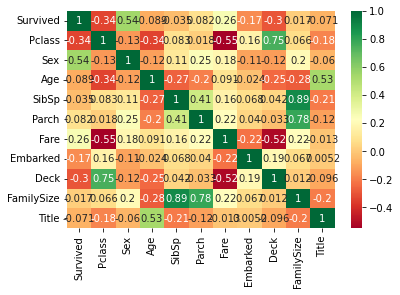

In [41]:
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn')
plt.title('Correlations between Features in Test')

In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    int64  
 8   Deck        891 non-null    int64  
 9   FamilySize  891 non-null    int64  
 10  Title       891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


### Normalization - Scaling
Scaling data means bringing all your feature values to a common scale, maintaining the individual relationships between each feature, this is, brinding each column of your dataframe to, say, values between 0 and 1. This makes sense: if a column has values between 1000 and 100000, and another between 0 and 1, some algorithms may incorrectly decide that the first feature is much more important than the second one. 





In [43]:
for i in range(10): # Run through all columns except encoded
    df.iloc[:,i] = df.iloc[:,i] / df.iloc[:,i].max()    # Scale each column dividing by maximum
    mean = df.iloc[:,i].mean()                        # Calculate column mean
    std = df.iloc[:,i].std()                          # Calculate column STD
    df.iloc[:,i] = (df.iloc[:,i] - mean)/std           # Normalie column
print(df.shape, df.head())

(891, 11)    Survived    Pclass       Sex       Age     SibSp     Parch      Fare  \
0 -0.788829  0.826913 -0.737281 -0.584353  0.432550 -0.473408 -0.502163   
1  1.266279 -1.565228  1.354813  0.620584  0.432550 -0.473408  0.786404   
2  1.266279  0.826913  1.354813 -0.283119 -0.474279 -0.473408 -0.488580   
3  1.266279 -1.565228  1.354813  0.394659  0.432550 -0.473408  0.420494   
4 -0.788829  0.826913 -0.737281  0.394659 -0.474279 -0.473408 -0.486064   

   Embarked      Deck  FamilySize  Title  
0  0.585625  0.521774    0.059127      2  
1 -1.941213 -1.916517    0.059127      3  
2  0.585625  0.521774   -0.560660      1  
3  0.585625 -1.916517    0.059127      3  
4  0.585625  0.521774   -0.560660      2  


In [ ]:
df.head()